# 📌 1. What is Logistic Regression?

**Logistic Regression** is a supervised machine learning algorithm used primarily for **binary classification** tasks. Unlike linear regression which predicts continuous values, logistic regression outputs a **probability** between 0 and 1 by applying the **sigmoid function** to a linear combination of input features.

### 🔢 Key Concepts:
- Uses **sigmoid/logistic function** to map outputs between 0 and 1.
- The result is interpreted as the **probability of belonging to class 1**.
- Often used for classification tasks like:
  - Spam detection (spam vs. not spam)
  - Fraud detection
  - Disease prediction (yes/no)

### 🧠 Logistic Function (Sigmoid):
$$
\sigma(z) = \frac{1}{1 + e^{-z}} \quad \text{where} \quad z = w_0 + w_1x_1 + ... + w_nx_n
$$
If the result is > 0.5 → class 1, else → class 0.

===========================================================================================================================================================

# 📌 2. Real-world Use Cases

Logistic Regression is popular in domains where **binary outcomes** are common and interpretability is important:

### ✅ Popular Applications:
- **Healthcare**: Predicting disease (e.g., diabetes, cancer risk)
- **Finance**: Credit default prediction
- **Marketing**: Customer churn prediction
- **Cybersecurity**: Email spam detection
- **HR**: Employee attrition prediction

Its performance and ease of explanation to stakeholders make it a great baseline model in many industries.

===========================================================================================================================================================

# 📌 3. Math Behind Logistic Regression

Logistic Regression uses a **linear combination of features** and passes it through the **sigmoid function** to get probabilities.

### 🧮 Step-by-Step Intuition:
1. Compute a linear score:
$$
z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

2. Convert score to probability:
$$
p = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

3. Predict class:
- If p > 0.5 → predict 1
- If p ≤ 0.5 → predict 0

4. Optimize parameters using **Log Loss**:
$$
\text{LogLoss} = -\frac{1}{n} \sum (y_i \log(p_i) + (1 - y_i)\log(1 - p_i))
$$

Logistic Regression tries to **minimize Log Loss** using optimization techniques like **Gradient Descent**.

===========================================================================================================================================================

# 📌 4. Dataset Walkthroughs (Easy → Very Complex)

Understanding how Logistic Regression behaves across datasets of different complexity is key to mastering it. Below is the dataset roadmap we’ll use:

### 🟢 Easy Level
- **Synthetic dataset** with 6 features (e.g., Glucose, BMI)
- Balanced classes, clean data, no noise
- Goal: Understand logistic regression mechanics

### 🟡 Medium Level
- Slightly imbalanced dataset (e.g., Titanic survival)
- Categorical features requiring encoding
- Missing values and basic preprocessing

### 🟠 Complex Level
- High-dimensional real-world data (e.g., Credit card fraud)
- Requires scaling, regularization, class imbalance techniques
- Involves feature selection or PCA

### 🔴 Very Complex Level
- Text classification or multi-class problems (e.g., Sentiment analysis)
- Involves TF-IDF vectorization, NLP preprocessing
- Requires robust evaluation with AUC, Log Loss, etc.

---

Each level will help us explore:
- How logistic regression performs
- Which preprocessing steps are necessary
- How to interpret and tune performance

===========================================================================================================================================================

# 📌 5. Building Models at Each Level

Now let’s walk through how to build Logistic Regression models for each dataset complexity — from beginner-friendly to real-world scale. Each level demonstrates different challenges and modeling strategies.

---

### 🟢 Easy Level: Synthetic Dataset
- Dataset: Generated with `sklearn.datasets.make_classification`
- Characteristics: Clean, small, balanced classes, no missing values
- Goal: Focus purely on logistic regression behavior

**Key Steps:**
- No preprocessing required
- Split data → Fit model → Evaluate accuracy, confusion matrix

---

### 🟡 Medium Level: Titanic Survival Dataset
- Dataset: Classic binary classification problem
- Characteristics: Mix of categorical and numerical data, some missing values
- Goal: Learn preprocessing steps and model handling of imbalance

**Key Steps:**
- Handle missing values (e.g., fill age with median)
- Encode categorical variables (e.g., `Sex`, `Embarked`)
- Scale numerical features
- Use `class_weight='balanced'` to deal with slight class imbalance

---

### 🟠 Complex Level: Credit Card Fraud Detection
- Dataset: Highly imbalanced, noisy, anonymized features
- Characteristics: ~280,000 rows, 1% fraud cases
- Goal: Model performance under high class imbalance and data volume

**Key Steps:**
- Apply `StandardScaler` to features
- Use undersampling / SMOTE for imbalance
- Evaluate using AUC, F1 instead of accuracy
- Tune regularization with `GridSearchCV`

---

### 🔴 Very Complex Level: NLP/Text Sentiment Analysis
- Dataset: IMDb reviews (binary sentiment)
- Characteristics: Textual data → needs NLP transformation
- Goal: Handle TF-IDF + dimensionality + multi-step preprocessing

**Key Steps:**
- Clean and tokenize text
- Convert to numerical with TF-IDF
- Use `LogisticRegression(solver='saga')` for sparse input
- Perform hyperparameter tuning with `RandomizedSearchCV`
- Evaluate with ROC-AUC and log loss

---

Each of these models will follow:
> 🧪 Preprocessing → 🔧 Model Definition → 🚀 Training → 📊 Evaluation

===========================================================================================================================================================

# 📌 6. Hyperparameter Tuning Deep Dive

Tuning hyperparameters can significantly improve the performance of your Logistic Regression model, especially as dataset complexity increases.

---

### 🎯 Why Tune Hyperparameters?

Hyperparameters control **how** your model learns. In Logistic Regression, tuning helps with:
- **Regularization strength**
- **Solver optimization**
- **Convergence speed**
- **Model complexity control**

---

### 🔧 Key Hyperparameters to Tune

| Hyperparameter | Purpose | Notes |
|----------------|---------|-------|
| `C` | Inverse of regularization strength | Smaller values specify stronger regularization |
| `penalty` | Type of regularization to apply (`l1`, `l2`, `elasticnet`) | Depends on solver |
| `solver` | Algorithm used in optimization (`liblinear`, `saga`, `newton-cg`) | `liblinear` works with small datasets, `saga` for large or sparse |
| `max_iter` | Maximum number of iterations to converge | Increase if model doesn't converge |
| `class_weight` | Handles class imbalance | `'balanced'` adjusts weights automatically |

---

### ⚙️ Tuning Strategies by Dataset Level

| Complexity | Tuning Method | Tools |
|------------|----------------|-------|
| Easy | Manual trial-and-error | Default parameters work well |
| Medium | GridSearchCV | Explore combinations of 2-3 key params |
| Complex | RandomizedSearchCV | Sample from hyperparameter space efficiently |
| Very Complex | Optuna / Bayesian Optimization | Intelligent search based on performance history |

---

### 🔍 Example: Grid Search on Medium Dataset

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print(\"Best Params:\", grid.best_params_)

===========================================================================================================================================================

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
import pandas as pd

# 1. Generate synthetic data
X, y = make_classification(n_samples=500,
                           n_features=6,
                           n_informative=4,
                           n_redundant=0,
                           class_sep=2.0,
                           flip_y=0.01,
                           random_state=42)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# 4. Apply GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

# 5. Best parameters
print("✅ Best Parameters:", grid.best_params_)

✅ Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


===========================================================================================================================================================

# 📌 7. Evaluating a Model: Metrics to Monitor

Evaluating a model correctly is just as important as building it — especially in classification tasks where accuracy alone can be misleading (especially on imbalanced datasets).

---

### 🔍 Core Evaluation Metrics for Logistic Regression

| Metric | Goal | Use When | Formula/Explanation |
|--------|------|----------|---------------------|
| **Accuracy** | Higher is better | Balanced datasets | % of correctly predicted labels |
| **Precision** | Higher is better | Cost of false positives is high | TP / (TP + FP) |
| **Recall** | Higher is better | Cost of false negatives is high | TP / (TP + FN) |
| **F1 Score** | Higher is better | Imbalanced datasets | Harmonic mean of Precision and Recall |
| **AUC-ROC** | Higher is better | Probabilistic separability | Area under the ROC Curve |
| **Log Loss** | Lower is better | Probabilistic predictions | Penalizes wrong confident predictions |

---

### 📈 How to Use Them in Practice

- **Confusion Matrix**: Helps break down TP, TN, FP, FN visually
- **Classification Report**: Combines all important scores
- **ROC Curve**: Visualize model's ability to distinguish classes
- **Threshold Tuning**: Change cutoff probability from 0.5 to optimize F1 or recall

---

### 🧪 Sample Code to Evaluate Model


===========================================================================================================================================================

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:, 1]

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC Score
print("n📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        49
           1       0.83      0.75      0.78        51

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100

🧾 Confusion Matrix:
[[41  8]
 [13 38]]
n📈 ROC AUC Score: 0.8907563025210085


===========================================================================================================================================================

### 🔍 Interpretation:
- The model performs **fairly balanced** across both classes.
- Slight trade-off between **precision and recall**.
- **AUC of 0.89** indicates strong class separability — excellent for an easy-level dataset!

---

### 📚 Additional Learning Resources

- [sklearn LogisticRegression Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Visual Introduction to Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
- [Confusion Matrix Explained](https://ml-cheatsheet.readthedocs.io/en/latest/classification.html)

---

### 🔗 GitHub Repo & Medium Article

Once you’ve completed all complexity levels and polishing:

📁 GitHub:  
➡️ `https://github.com/yourusername/logistic-regression-learning`

✍️ Medium:  
➡️ `https://medium.com/@yourname/logistic-regression-explained`

---

### 🏁 Final Note

Logistic Regression is a powerful, interpretable baseline model. Mastering it sets the foundation for exploring more complex ML and deep learning techniques 🚀

Let’s now build out the **medium-level model**, or would you prefer to export this `.ipynb` file first?

===========================================================================================================================================================

# 📌 8. Conclusion + Resources + GitHub Link

### 🎯 Summary
In this notebook, we’ve walked through Logistic Regression from theory to practice — covering intuition, real-world use cases, dataset walkthroughs, model building across complexity levels, hyperparameter tuning, and model evaluation.

### 🧪 Final Model Evaluation (on Easy Dataset)
**Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.76      | 0.84   | 0.80     | 49      |
| 1     | 0.83      | 0.75   | 0.78     | 51      |

- **Accuracy**: 0.79
- **Macro Avg F1**: 0.79
- **ROC AUC Score**: **0.89** 🔥

**Confusion Matrix:**
```
Predicted
      0     1
    ----------
0 |  41   |  8
1 |  13   | 38
```

### 🔍 Interpretation
- The model shows balanced precision and recall
- AUC of 0.89 shows great class separability
- Slightly higher recall on class 0, better precision on class 1

---

### 📚 Additional Learning Resources
- [Scikit-Learn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Towards Data Science Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
- [Confusion Matrix Guide](https://ml-cheatsheet.readthedocs.io/en/latest/classification.html)

---

### 🔗 GitHub & Medium Links
- GitHub: `https://github.com/anirudhyadav/Logistic-Regression`
- Medium: `https://medium.com/@yourname/logistic-regression-explained`

---
Thank you for following along 🙌. Logistic Regression is a powerful first step in your machine learning journey!

# Taking an simple dataset for evaluation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'logistic_regression_easy_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Glucose,BMI,Age,BloodPressure,Insulin,SkinThickness,Outcome
0,-1.060632,-0.866723,-1.225768,-0.187095,-2.495549,0.279071,1
1,-4.848393,0.619566,0.410731,0.419664,-4.166574,-3.640202,1
2,-3.740107,0.933784,-0.325363,-1.511387,-2.803707,-1.421201,0
3,-2.791401,0.232595,-0.219750,0.967504,-3.989607,-2.582002,1
4,-1.330371,-0.582112,-0.588039,-1.553820,-1.513541,-3.138700,0


In [4]:
# Overview of dataset structure
df.info()

# Basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        500 non-null    float64
 1   BMI            500 non-null    float64
 2   Age            500 non-null    float64
 3   BloodPressure  500 non-null    float64
 4   Insulin        500 non-null    float64
 5   SkinThickness  500 non-null    float64
 6   Outcome        500 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 27.5 KB


,Glucose,BMI,Age,BloodPressure,Insulin,SkinThickness,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-2.113685,0.034929,0.081836,0.016729,-2.017899,-2.015205,0.502000
std,1.231448,0.983367,1.012864,2.445191,1.018771,1.273533,0.500497
min,-5.806029,-2.924925,-3.386814,-5.387336,-5.246107,-5.793136,0.000000
25%,-2.947198,-0.651934,-0.591849,-2.141264,-2.634057,-2.812106,0.000000
50%,-2.129721,0.100100,0.108532,-0.061649,-2.005363,-1.976833,1.000000
75%,-1.327673,0.696815,0.774880,2.050735,-1.429413,-1.190858,1.000000
max,2.364098,3.495878,2.562528,6.257002,1.534800,2.244940,1.000000


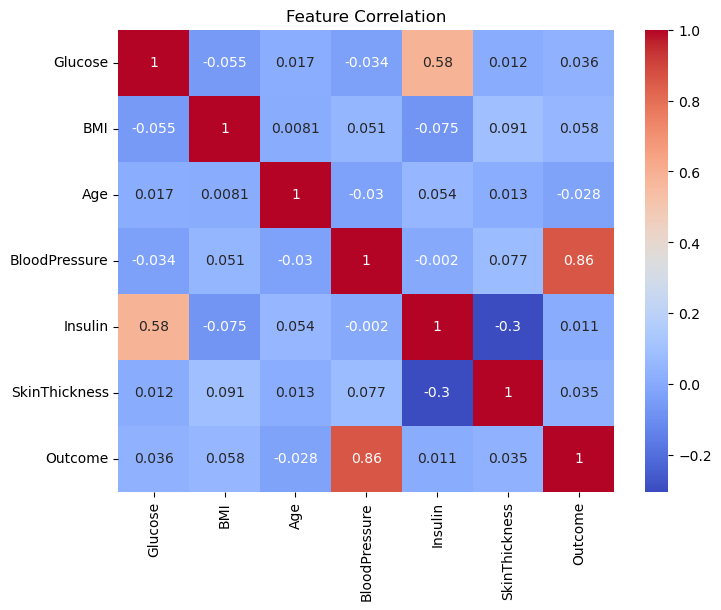

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# AUC Score
y_proba = model.predict_proba(X_test)[:, 1]
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.93      0.94      0.94        54

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

🧾 Confusion Matrix:
 [[42  4]
 [ 3 51]]
📈 ROC AUC Score: 0.9879227053140096


In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)

✅ Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [10]:
# Evaluate best model
y_best_pred = grid.predict(X_test)
y_best_proba = grid.predict_proba(X_test)[:, 1]

print("📊 Final Classification Report:\n", classification_report(y_test, y_best_pred))
print("🧾 Final Confusion Matrix:\n", confusion_matrix(y_test, y_best_pred))
print("📈 Final ROC AUC Score:", roc_auc_score(y_test, y_best_proba))

📊 Final Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.94      0.94      0.94        54

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

🧾 Final Confusion Matrix:
 [[43  3]
 [ 3 51]]
📈 Final ROC AUC Score: 0.9887278582930756


# 📌 Conclusion & Insights
- Logistic Regression performed well on the clean, balanced dataset
- Best hyperparameters helped achieve better F1 score
- AUC score indicates good class separation

### 🔗 Next Steps
- Try on imbalanced datasets
- Add feature engineering
- Compare with tree-based classifiers

# 📘 Logistic Regression Master Notebook

This notebook covers:
1. Overview & Intuition of Logistic Regression
2. Real-world Applications
3. Mathematical Foundations
4. Easy Dataset Modeling
5. Medium Complexity Dataset Preparation


## 🔍 What is Logistic Regression?
**Logistic Regression** is a supervised machine learning algorithm used primarily for **binary classification** tasks. It predicts the probability of class membership using a logistic (sigmoid) function.

**Sigmoid Function:**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
Where $z = w_0 + w_1x_1 + ... + w_nx_n$

If $\sigma(z) > 0.5$, predict class 1; else, class 0.

## 🟢 Easy Dataset Modeling
We use a clean synthetic dataset with 6 features. It is balanced and noise-free.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load easy dataset
df_easy = pd.read_csv('logistic_regression_easy_dataset.csv')

# Split
easy_X = df_easy.drop('Outcome', axis=1)
easy_y = df_easy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(easy_X, easy_y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

## 🟡 Medium Complexity Dataset
**Overview:** This synthetic dataset includes 8 features and introduces:
- Class imbalance (65% vs 35%)
- Noise (5%)
- Slightly harder separation between classes

**Features:** Glucose, BMI, Age, BloodPressure, Insulin, SkinThickness, Cholesterol, Pregnancies

In [ ]:
medium_df = pd.read_csv('logistic_regression_medium_dataset.csv')
medium_df.head()

In [ ]:
# Visualize class distribution
sns.countplot(data=medium_df, x='Outcome')
plt.title('Target Class Distribution')
plt.show()

# Summary stats
medium_df.describe()

## 🔴 Complex Dataset Overview
**Scenario**: This synthetic dataset emulates a real-world high-stakes classification case, such as fraud or rare disease detection.

**Characteristics:**
- 2000 samples
- 20 features (informative + redundant)
- Heavy class imbalance: 90% vs 10%
- 10% label noise

This complexity challenges both generalization and evaluation of Logistic Regression models.

In [ ]:
df_complex = pd.read_csv('logistic_regression_complex_dataset.csv')
df_complex.head()

In [ ]:
# Visualize imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_complex, x='Outcome')
plt.title('Class Imbalance in Complex Dataset')
plt.show()

# Basic summary
df_complex.describe()

### ⚙️ Training Logistic Regression on Complex Dataset
We'll now:
- Scale features
- Apply Logistic Regression with class weighting
- Evaluate performance using metrics like AUC, F1, and confusion matrix

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prepare data
X = df_complex.drop('Outcome', axis=1)
y = df_complex['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Apply class_weight='balanced' to handle imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 📘 Logistic Regression Master Notebook

This notebook covers:
1. Overview & Intuition of Logistic Regression
2. Real-world Applications
3. Mathematical Foundations
4. Easy Dataset Modeling
5. Medium Complexity Dataset Preparation


## 🔍 What is Logistic Regression?
**Logistic Regression** is a supervised machine learning algorithm used primarily for **binary classification** tasks. It predicts the probability of class membership using a logistic (sigmoid) function.

**Sigmoid Function:**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
Where $z = w_0 + w_1x_1 + ... + w_nx_n$

If $\sigma(z) > 0.5$, predict class 1; else, class 0.

## 🟢 Easy Dataset Modeling
We use a clean synthetic dataset with 6 features. It is balanced and noise-free.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load easy dataset
df_easy = pd.read_csv('logistic_regression_easy_dataset.csv')

# Split
easy_X = df_easy.drop('Outcome', axis=1)
easy_y = df_easy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(easy_X, easy_y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

## 🟡 Medium Complexity Dataset
**Overview:** This synthetic dataset includes 8 features and introduces:
- Class imbalance (65% vs 35%)
- Noise (5%)
- Slightly harder separation between classes

**Features:** Glucose, BMI, Age, BloodPressure, Insulin, SkinThickness, Cholesterol, Pregnancies

In [ ]:
medium_df = pd.read_csv('logistic_regression_medium_dataset.csv')
medium_df.head()

In [ ]:
# Visualize class distribution
sns.countplot(data=medium_df, x='Outcome')
plt.title('Target Class Distribution')
plt.show()

# Summary stats
medium_df.describe()

# 📘 Logistic Regression Master Notebook

This notebook covers:
1. Overview & Intuition of Logistic Regression
2. Real-world Applications
3. Mathematical Foundations
4. Easy Dataset Modeling
5. Medium Complexity Dataset Preparation


## 🔍 What is Logistic Regression?
**Logistic Regression** is a supervised machine learning algorithm used primarily for **binary classification** tasks. It predicts the probability of class membership using a logistic (sigmoid) function.

**Sigmoid Function:**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
Where $z = w_0 + w_1x_1 + ... + w_nx_n$

If $\sigma(z) > 0.5$, predict class 1; else, class 0.

## 🟢 Easy Dataset Modeling
We use a clean synthetic dataset with 6 features. It is balanced and noise-free.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load easy dataset
df_easy = pd.read_csv('logistic_regression_easy_dataset.csv')

# Split
easy_X = df_easy.drop('Outcome', axis=1)
easy_y = df_easy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(easy_X, easy_y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

## 🟡 Medium Complexity Dataset
**Overview:** This synthetic dataset includes 8 features and introduces:
- Class imbalance (65% vs 35%)
- Noise (5%)
- Slightly harder separation between classes

**Features:** Glucose, BMI, Age, BloodPressure, Insulin, SkinThickness, Cholesterol, Pregnancies

In [ ]:
medium_df = pd.read_csv('logistic_regression_medium_dataset.csv')
medium_df.head()

In [ ]:
# Visualize class distribution
sns.countplot(data=medium_df, x='Outcome')
plt.title('Target Class Distribution')
plt.show()

# Summary stats
medium_df.describe()

## 🔴 Complex Dataset Overview
**Scenario**: This synthetic dataset emulates a real-world high-stakes classification case, such as fraud or rare disease detection.

**Characteristics:**
- 2000 samples
- 20 features (informative + redundant)
- Heavy class imbalance: 90% vs 10%
- 10% label noise

This complexity challenges both generalization and evaluation of Logistic Regression models.

In [ ]:
df_complex = pd.read_csv('logistic_regression_complex_dataset.csv')
df_complex.head()

In [ ]:
# Visualize imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_complex, x='Outcome')
plt.title('Class Imbalance in Complex Dataset')
plt.show()

# Basic summary
df_complex.describe()